In [1]:
print('Hi bioimage analyst')

Hi bioimage analyst


## Importing libraries
* scikit-image input output functionality
* matplotlib.pyplot for plotting

In [2]:
import skimage.io as skio
import matplotlib.pyplot as plt

## Reading a demo tif file
Read the image and ask for its shape

In [3]:
img = skio.imread("./data/rice.tif", plugin="tifffile")
img.shape
# note how ipython prints the desired output

(512, 512)

Plot the image data

min pixel value:  33
max pixel value:  214


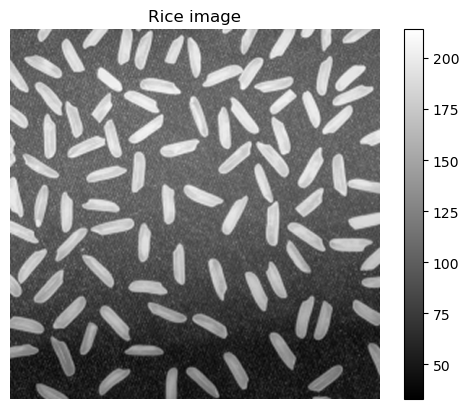

In [4]:
plt.imshow(img, cmap="gray")
plt.colorbar()
plt.title('Rice image')
plt.axis('off')
# also print the min and max value of the iamge
print('min pixel value: ', img.min())
print('max pixel value: ', img.max())

## Trying to segment the image
Let us try to segment the image without any pre-processing using the otsu method

In [5]:
# importing otsu from scikit-image
from skimage.filters import threshold_otsu

Segment the image and show the results

The value is:  131


(-0.5, 511.5, 511.5, -0.5)

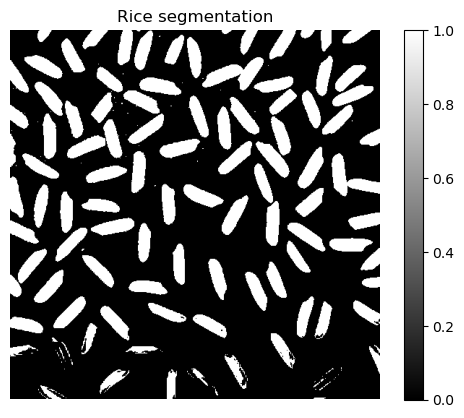

In [6]:
th_val = threshold_otsu(img)
print('The value is: ', th_val)
bw_otsu = img > th_val
plt.imshow(bw_otsu, cmap='gray')
plt.colorbar()
plt.title('Rice segmentation')
plt.axis('off')

Unfortunately the segmentation is not good sue to uneven illumination.
## Pre-processing to remove uneven illumination
For this we will use a simple gaussian blurr

In [7]:
# importing gaussian filter from scikit-image
from skimage.filters import gaussian

(-0.5, 511.5, 511.5, -0.5)

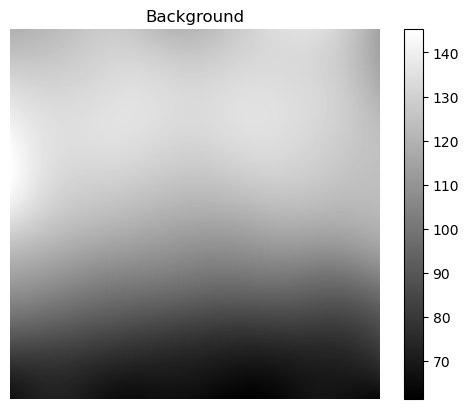

In [8]:
img_bg = gaussian(img,sigma=50,preserve_range=True)
plt.imshow(img_bg, cmap=plt.cm.gray)
plt.colorbar()
plt.title('Background')
plt.axis('off')

Remove background from image

min pixel value:  -58.11170235831236
max pixel value:  86.87791025511821


(-0.5, 511.5, 511.5, -0.5)

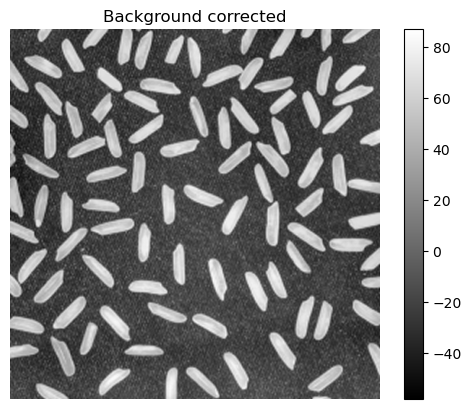

In [9]:
img_no_bg = img - img_bg

plt.imshow(img_no_bg, cmap='gray')
plt.colorbar()
print('min pixel value: ',img_no_bg.min())
print('max pixel value: ',img_no_bg.max())
plt.title('Background corrected')
plt.axis('off')

Now we segment the pre-processed image

The value is:  16.93174948262338


(-0.5, 511.5, 511.5, -0.5)

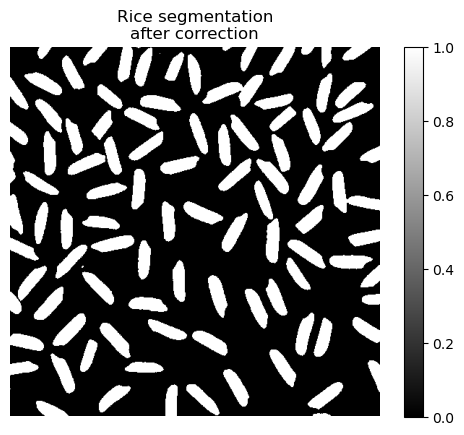

In [10]:
th_val = threshold_otsu(img_no_bg)
print('The value is: ', th_val)
bw_otsu = img_no_bg > th_val
plt.imshow(bw_otsu, cmap='gray')
plt.colorbar()
plt.title('Rice segmentation\nafter correction')
plt.axis('off')

## Simple quantification
Now we will use scikit-image together with pandas to create output tables from our results and then plot some values of interest, in this case area.

In [11]:
import pandas as pd
from skimage.measure import label, regionprops, regionprops_table
from skimage.segmentation import clear_border
from skimage.morphology import area_opening

(-0.5, 511.5, 511.5, -0.5)

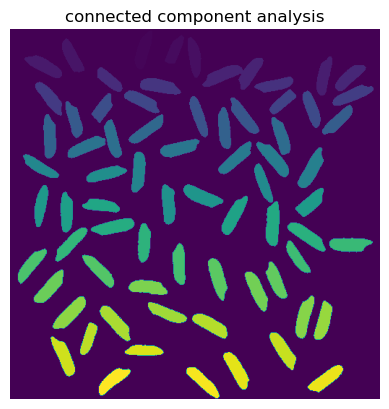

In [12]:
# remove segmentations that touch the border of the iamge
mask = clear_border(bw_otsu)
# remove small objects
mask = area_opening(mask, area_threshold=200)
# run connected component analysis
lbl = label(mask)
# plot the retuls
plt.imshow(lbl)
plt.title('connected component analysis')
plt.axis('off')

Now we can calculate some properties, both morphological and intensity based

   label  area  eccentricity  intensity_mean
0      1   780      0.949531      181.162821
1      2   567      0.931534      183.857143
2      3   730      0.956889      186.372603
3      4   744      0.940065      184.928763
4      5   828      0.945260      179.920290
           label         area  eccentricity  intensity_mean
count  71.000000    71.000000     71.000000       71.000000
mean   36.000000   803.070423      0.949983      171.105638
std    20.639767   134.387853      0.011988       20.202658
min     1.000000   567.000000      0.891550      121.419162
25%    18.500000   745.000000      0.944974      160.908136
50%    36.000000   791.000000      0.950249      180.693587
75%    53.500000   870.000000      0.957985      184.871401
max    71.000000  1608.000000      0.968018      194.544389


array([[<Axes: title={'center': 'area'}>]], dtype=object)

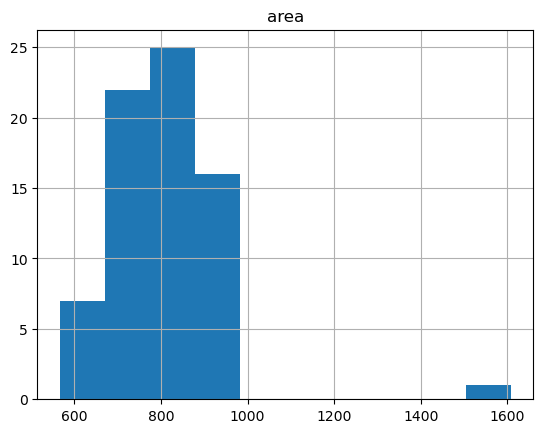

In [13]:
properties = ['label', 'area','eccentricity','intensity_mean']
table = regionprops_table(label_image=lbl, intensity_image=img, properties=properties)
table = pd.DataFrame(table)
print(table.head())
print(table.describe())
table.hist(column='area')